## Heston Model

Heston model treats volatility as a random process rather than a constant variable.

Basic Heston Model assumes price of an asset $S_t$ is determined by a stochastic process.

$dS_{t} = \mu S_t dt + \sqrt{\nu_t}S_t d W_t^S$

where $\nu_t$ is the instantaneous variance, which is given by a Feller square-root or CIR process,

$d\nu_{t}=\kappa(\theta-\nu_{t})dt+\xi {\sqrt {\nu _{t}}}dW_{t}^{\nu }$,

and $W_{t}^{S},W_{t}^{\nu }$ are Wiener processes (i.e., continuous random walks) with correlation ρ.

The model has five parameters:

* $\nu _{0}$, the initial variance.
* $\theta$, the long variance, or long-run average variance of the price; as $t$ tends to infinity, the expected value of $\nu_{t}$ tends to $\theta$.
* $\rho$, the correlation of the two Wiener processes.
* $\kappa$, the rate at which $\nu_{t}$ reverts to $\theta$ (rate of mean reversion)
* $\xi$, the volatility of the volatility, or 'vol of vol', which determines the variance of $\nu_t$.
If the parameters obey the following condition (known as the Feller condition) then the process $\nu_t$ is strictly positive.

$2\kappa \theta >\xi ^{2}$

Taken from: https://en.wikipedia.org/wiki/Heston_model

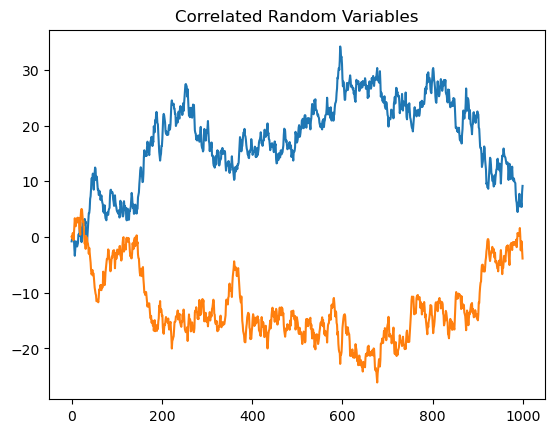

In [15]:
import numpy as np
import matplotlib.pyplot as plt

rho = -0.7 # correlation of the Wiener process
Ndraws = 1000 # number of samples to draw for
mu = np.array([0,0]) # setting mean to zero
cov = np.array([[1, rho] , [rho, 1]]) # setting up cov matrix for sampling

# draw from Multivariate normal distribution
W = np.random.multivariate_normal(mu, cov, size=Ndraws)

plt.plot(W.cumsum(axis=0));
plt.title('Correlated Random Variables')
plt.show()

In [39]:
def standard_deviation(array, sample=True):
    return np.sqrt(variance(array, sample))

In [32]:
def variance(array, sample=True):
    sample = 1 if sample else 0
    return ((array - array.mean())**2).sum() / (len(array) - sample)

In [43]:
def covariance(array1, array2, sample=True):
    sample = 1 if sample else 0
    return ((array1 - array1.mean()) * (array2 - array2.mean())).sum() / (len(array1) - sample)

In [44]:
def correlation(array1, array2):
    return covariance(array1, array2) / (standard_deviation(array1) * standard_deviation(array2))

In [47]:
# Calculate the difference between state and calculate correlation
correlation(W[:, 0], W[:, 1]) - rho

-0.009789545050761905

In [49]:
np.corrcoef(W.T) - cov

array([[ 0.        , -0.00978955],
       [-0.00978955,  0.        ]])